<br>

<br>

# **MODELO XBOOST** 🚀

<br>

## **ÍNDICE**

- **PASO 1: LIBRERÍAS**
- **PASO 2: LECTURA Y VISUALIZACIÓN DEL DATASET**
- **PASO 3: DIVISIÓN DE DATOS TRAIN/TEST**
- **PASO 4: ESCALADO NUMÉRICO**
- **PASO 5: CODIFICACIÓN ONE-HOT (TRAIN/TEST)**
- **PASO 6: SELECCIÓN K-BEST (K=20)**
- **PASO 7: MODELO XGBOOST**
- **PASO 8: ENTRENAMIENTO DEL MODELO DE XGBOOST**
- **PASO 9: PREDICCIONES TEST**
- **PASO 10: PREDICCIONES TRAIN**
- **PASO 11: MÉTRICAS XGBOOST**
- **PASO 12: GUARDAR MODELO XGBOOST**

<br>

<br>

<br>

## **PASO 1: LIBRERÍAS**

In [55]:
import os
import joblib
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")


<br>

## **PASO 2: LECTURA Y VISUALIZACIÓN DEL DATASET**

In [56]:
df = pd.read_csv('/workspaces/DETECCION-FRAUDE-BANCARIO/src/Base_100milfilas.csv')
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.9,0.475015,-1,67,50,0.008162,-0.947659,AB,2998,...,0,1500.0,0,INTERNET,2.892488,other,1,1,0,0
1,0,0.8,0.723322,23,9,30,0.038436,-1.764405,AB,859,...,0,1000.0,0,INTERNET,1.260981,windows,1,1,0,0
2,0,0.5,0.032770,-1,30,40,0.013338,-1.254882,AB,2689,...,0,200.0,1,INTERNET,16.785044,linux,0,1,0,0
3,1,0.9,0.570800,-1,157,60,0.005908,35.337538,AA,4079,...,0,1500.0,0,INTERNET,4.036394,windows,1,1,0,0
4,0,0.5,0.743169,-1,41,50,0.012817,14.357233,AA,3527,...,1,500.0,0,INTERNET,38.482143,other,0,1,0,0


<br>

## **PASO 3: DIVISIÓN DE DATOS TRAIN/TEST**

In [57]:
print("DIVISIÓN DEL CONJUNTO DE DATOS EN ENTRENAMIENTO Y PRUEBA\n")
# Se dividen el conjunto de datos en muestras de train y test
X = df.drop("fraud_bool", axis = 1)
y = df["fraud_bool"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

DIVISIÓN DEL CONJUNTO DE DATOS EN ENTRENAMIENTO Y PRUEBA



,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
75220,0.6,0.270506,-1,26,30,0.021974,-0.264050,AB,1399,3799.505949,...,0,200.0,0,INTERNET,4.740897,macintosh,1,1,0,5
48955,0.9,0.150723,-1,96,40,0.807552,-1.630215,AC,912,4547.412245,...,0,200.0,0,INTERNET,8.143705,windows,0,2,0,3
44966,0.4,0.425121,-1,205,20,0.010792,13.220485,AA,1927,8501.804609,...,1,500.0,0,INTERNET,7.486885,linux,0,1,0,3
13568,0.8,0.133088,-1,59,20,5.918782,2.706204,AA,1511,3014.081394,...,0,200.0,0,INTERNET,8.280017,other,0,1,0,1
92727,0.4,0.163981,-1,37,40,0.007141,-0.649811,AC,542,6048.521121,...,0,200.0,0,INTERNET,9.077518,linux,1,1,0,7


<br>

## **PASO 4: ESCALADO NUMÉRICO**

In [58]:
print("SE HAN IDENTIFICADO Y ESCALADO LAS VARIABLES NUMÉRICAS - EXCLUYENDO LA VARIABLE OBJETIVO\n")
# Identifico las variables numéricas automáticamente, excluyendo 'fraud_bool' 
variables_numericas = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col]) and col != 'fraud_bool']

# Instancio el escalador
scaler = StandardScaler()

# Entreno el escalador con los datos de entrenamiento
scaler.fit(X_train[variables_numericas])

# Aplico el escalador en los datos de entrenamiento
X_train_final = scaler.transform(X_train[variables_numericas])
X_train_final = pd.DataFrame(X_train_final, index=X_train.index, columns=variables_numericas)

# Aplico el escalador en los datos de prueba
X_test_final = scaler.transform(X_test[variables_numericas])
X_test_final = pd.DataFrame(X_test_final, index=X_test.index, columns=variables_numericas)

# Muestro las primeras filas de los datos escalados de entrenamiento
X_train_final.head()

SE HAN IDENTIFICADO Y ESCALADO LAS VARIABLES NUMÉRICAS - EXCLUYENDO LA VARIABLE OBJETIVO



,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
75220,0.087928,-0.729357,-0.385007,-0.715763,-0.356487,-0.187864,-0.423236,-0.176144,-0.609737,0.485570,...,0.361737,1.575640,-0.516415,-0.675693,-0.170075,-0.350447,0.905860,-0.121822,0.0,0.760499
48955,1.119997,-1.139668,-0.385007,0.073872,0.453849,-0.042878,-0.491750,-0.661163,-0.360815,0.138260,...,0.361737,-0.966666,-0.516415,-0.675693,-0.170075,0.058983,-1.103924,4.878555,0.0,-0.138928
44966,-0.600118,-0.199731,-0.385007,1.303445,-1.166824,-0.189927,0.253023,0.349708,0.955303,0.144296,...,-2.764436,1.411620,1.936427,-0.090788,-0.170075,-0.020046,-1.103924,-0.121822,0.0,-0.138928
13568,0.775974,-1.200076,-0.385007,-0.343506,-1.166824,0.900445,-0.274275,-0.064600,-0.871145,0.315913,...,-2.764436,-0.064557,-0.516415,-0.675693,-0.170075,0.075384,-1.103924,-0.121822,0.0,-1.038355
92727,-0.600118,-1.094254,-0.385007,-0.591677,0.453849,-0.190601,-0.442582,-1.029658,0.138790,-1.316091,...,0.361737,-0.966666,-0.516415,-0.675693,-0.170075,0.171341,0.905860,-0.121822,0.0,1.659926


<br>

## **PASO 5: CODIFICACIÓN ONE-HOT (TRAIN/TEST)**

In [59]:
print("SE HAN IDENTIFICADO Y CODIFICADO LAS VARIABLES CATEGÓRICAS\n")
# Identificar las variables categóricas
columnas_categoricas = [col for col in X_train.columns if X_train[col].dtype == 'object']

# Instanciar el OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # usar sparse_output en lugar de sparse

# Ajustar el OneHotEncoder a los datos de entrenamiento y transformar tanto train como test
X_train_categ = encoder.fit_transform(X_train[columnas_categoricas])
X_test_categ = encoder.transform(X_test[columnas_categoricas])

# Convertir a DataFrames y añadir al conjunto original
X_train_categ = pd.DataFrame(X_train_categ, columns=encoder.get_feature_names_out(columnas_categoricas), index=X_train.index)
X_test_categ = pd.DataFrame(X_test_categ, columns=encoder.get_feature_names_out(columnas_categoricas), index=X_test.index)

# Eliminar las variables categóricas originales del DataFrame
X_train = X_train.drop(columnas_categoricas, axis=1)
X_test = X_test.drop(columnas_categoricas, axis=1)

# Concatenar las nuevas variables dummy con el DataFrame original
X_train = pd.concat([X_train, X_train_categ], axis=1)
X_test = pd.concat([X_test, X_test_categ], axis=1)

SE HAN IDENTIFICADO Y CODIFICADO LAS VARIABLES CATEGÓRICAS



<br>

## **PASO 6: SELECCIÓN K-BEST (K=20)**

In [60]:
print("SELECCIÓN DE LAS MEJORES CARACTERÍSTICAS (K=20):\n")
# Con un valor de k = 20
selection_model = SelectKBest(score_func=f_classif, k = 20)

# entreno la selecciòn
selection_model.fit(X_train_final, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_final), columns = X_train_final.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_final), columns = X_test_final.columns.values[ix])

X_train_sel

SELECCIÓN DE LAS MEJORES CARACTERÍSTICAS (K=20):



,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,intended_balcon_amount,velocity_6h,velocity_24h,velocity_4w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,has_other_cards,proposed_credit_limit,foreign_request,keep_alive_session,device_distinct_emails_8w,month
0,0.087928,-0.729357,-0.385007,-0.715763,-0.356487,-0.423236,-0.609737,0.485570,-0.632024,-0.451243,-0.614697,-1.096540,-0.822036,0.361737,-0.516415,-0.675693,-0.170075,0.905860,-0.121822,0.760499
1,1.119997,-1.139668,-0.385007,0.073872,0.453849,-0.491750,-0.360815,0.138260,0.077431,-1.243452,-0.753288,0.911959,-0.822036,0.361737,-0.516415,-0.675693,-0.170075,-1.103924,4.878555,-0.138928
2,-0.600118,-0.199731,-0.385007,1.303445,-1.166824,0.253023,0.955303,0.144296,-0.086388,-0.055138,1.006812,-1.096540,1.216491,-2.764436,1.936427,-0.090788,-0.170075,-1.103924,-0.121822,-0.138928
3,0.775974,-1.200076,-0.385007,-0.343506,-1.166824,-0.274275,-0.871145,0.315913,0.722971,0.340967,-0.836442,0.911959,1.216491,-2.764436,-0.516415,-0.675693,-0.170075,-1.103924,-0.121822,-1.038355
4,-0.600118,-1.094254,-0.385007,-0.591677,0.453849,-0.442582,0.138790,-1.316091,-1.852401,-0.847348,-0.559261,-1.096540,1.216491,0.361737,-0.516415,-0.675693,-0.170075,0.905860,-0.121822,1.659926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,1.119997,-1.313161,-0.385007,1.201920,1.264186,-0.433457,-0.046723,1.672075,1.623416,-1.441505,0.535605,0.911959,1.216491,-2.764436,-0.516415,1.858894,-0.170075,-1.103924,4.878555,-1.488068
79996,1.119997,-0.991890,-0.385007,-0.873689,1.264186,-0.446129,-1.755672,-0.882742,-0.451663,-0.451243,0.840504,-1.096540,1.216491,0.361737,1.936427,1.858894,-0.170075,0.905860,-0.121822,0.310786
79997,0.087928,-1.002882,-0.385007,-0.061494,-0.356487,-0.453265,0.397015,-0.003384,0.551266,0.737072,-0.171207,0.911959,1.216491,0.361737,-0.516415,-0.675693,-0.170075,-1.103924,-0.121822,0.760499
79998,0.775974,-1.324216,0.789772,-0.941372,-0.356487,-0.482288,-0.662654,-0.606962,2.018592,0.935124,-1.792717,0.911959,1.216491,0.361737,-0.516415,-0.675693,-0.170075,0.905860,-0.121822,-1.488068


<br>

## **PASO 7: MODELO XGBOOST**

In [61]:
print("MODELO DE XGBOOST")
model_xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

MODELO DE XGBOOST


<br>

## **PASO 8: ENTRENAMIENTO DEL MODELO XGBOOST**

In [62]:
model_xgb.fit(X_train_sel, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

<br>

## **PASO 9: PREDICCIONES TEST**

In [63]:
print("PREDICCIÓN DEL CONJUNTO TEST:")
y_pred_xgb = model_xgb.predict(X_test_sel)
print(y_pred_xgb[:10])


PREDICCIÓN DEL CONJUNTO TEST:
[0 0 0 0 0 0 0 0 1 0]


<br>

## **PASO 10: PREDICCIONES TRAIN**

In [64]:
print("PREDICCIÓN DEL CONJUNTO TRAIN:")
y_train_pred_xgb = model_xgb.predict(X_train_sel)
print(y_train_pred_xgb[:10])


PREDICCIÓN DEL CONJUNTO TRAIN:
[0 1 0 0 0 0 0 0 0 0]


<br>

## **PASO 11: MÉTRICAS XGBOOST**

In [65]:
accuracy_test = accuracy_score(y_test, y_pred_xgb)
f1_test = f1_score(y_test, y_pred_xgb)
precision_test = precision_score(y_test, y_pred_xgb)
recall_test = recall_score(y_test, y_pred_xgb)

accuracy_train = accuracy_score(y_train, y_train_pred_xgb)
f1_train = f1_score(y_train, y_train_pred_xgb)
precision_train = precision_score(y_train, y_train_pred_xgb)
recall_train = recall_score(y_train, y_train_pred_xgb)

print("MÉTRICAS TEST:")
print(f"Accuracy Test: {accuracy_test:.4f}")
print(f"F1 Score Test: {f1_test:.4f}")
print(f"Precision Test: {precision_test:.4f}")
print(f"Recall Test: {recall_test:.4f}")

print("MÉTRICAS TRAIN:")
print(f"Accuracy Train: {accuracy_train:.4f}")
print(f"F1 Score Train: {f1_train:.4f}")
print(f"Precision Train: {precision_train:.4f}")
print(f"Recall Train: {recall_train:.4f}")


MÉTRICAS TEST:
Accuracy Test: 0.9010
F1 Score Test: 0.4002
Precision Test: 0.6195
Recall Test: 0.2956
MÉTRICAS TRAIN:
Accuracy Train: 0.9310
F1 Score Train: 0.5924
Precision Train: 0.8440
Recall Train: 0.4564


In [66]:
report_test = classification_report(y_test, y_pred_xgb, target_names=['No Fraude', 'Fraude'])
print("COMPARACIÓN DE TEST:")
print(report_test)


COMPARACIÓN DE TEST:
              precision    recall  f1-score   support

   No Fraude       0.92      0.98      0.95     17764
      Fraude       0.62      0.30      0.40      2236

    accuracy                           0.90     20000
   macro avg       0.77      0.64      0.67     20000
weighted avg       0.88      0.90      0.88     20000



In [67]:
report_train = classification_report(y_train, y_train_pred_xgb, target_names=['No Fraude', 'Fraude'])
print("COMPARACIÓN DE TRAIN:")
print(report_train)


COMPARACIÓN DE TRAIN:
              precision    recall  f1-score   support

   No Fraude       0.94      0.99      0.96     71207
      Fraude       0.84      0.46      0.59      8793

    accuracy                           0.93     80000
   macro avg       0.89      0.72      0.78     80000
weighted avg       0.93      0.93      0.92     80000



<br>

## **PASO 12: GUARDAR MODELO XBOOST**

In [68]:
save_path = "/workspaces/DETECCION-FRAUDE-BANCARIO/models/saved_models"

os.makedirs(save_path, exist_ok=True)

model_filename = os.path.join(save_path, "xgboost_model.pkl")
joblib.dump(model_xgb, model_filename)

print(f"Modelo guardado en: {model_filename}")

Modelo guardado en: /workspaces/DETECCION-FRAUDE-BANCARIO/models/saved_models/xgboost_model.pkl


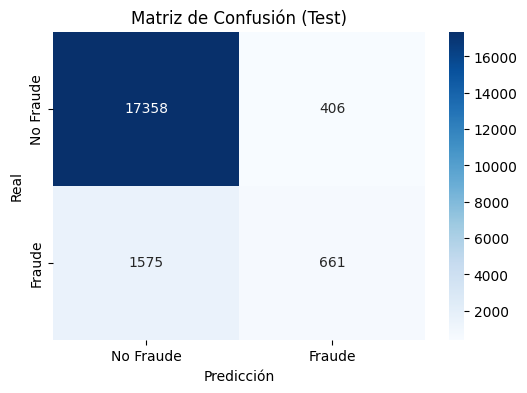

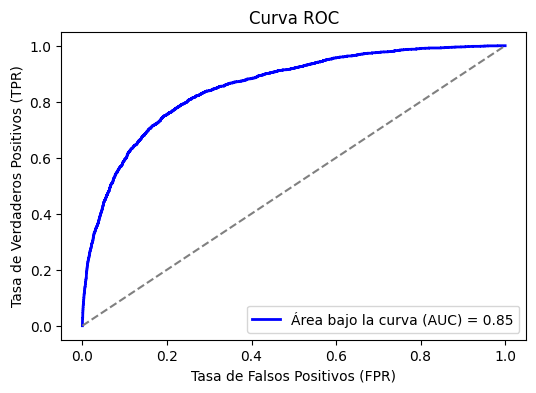

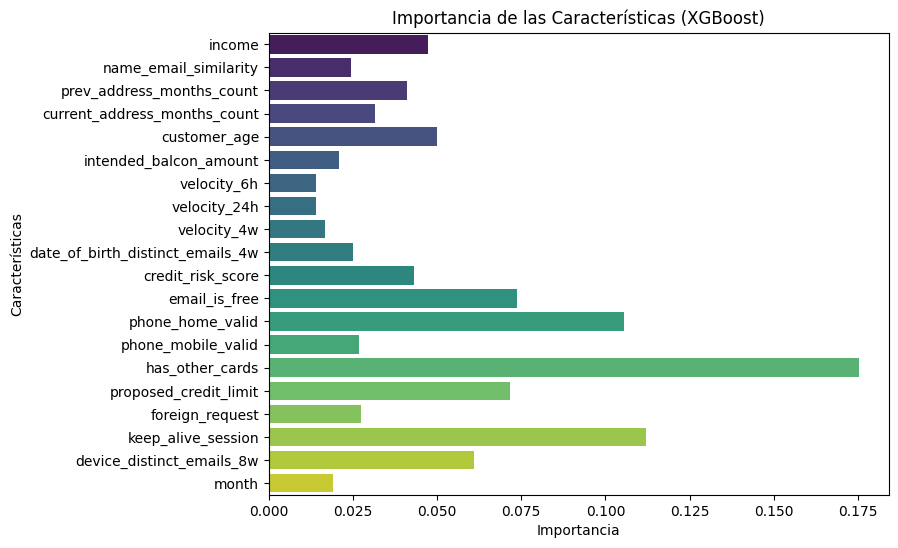

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 1. Matriz de confusión para el conjunto de prueba
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión (Test)")
plt.show()

# 2. Curva ROC y AUC
y_prob_xgb = model_xgb.predict_proba(X_test_sel)[:, 1]  # Probabilidades para la clase positiva (fraude)
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Área bajo la curva (AUC) = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# 3. Importancia de características
feature_importance = model_xgb.feature_importances_
features = X_train_sel.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=features, palette="viridis")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("Importancia de las Características (XGBoost)")
plt.show()


<br>

<br>

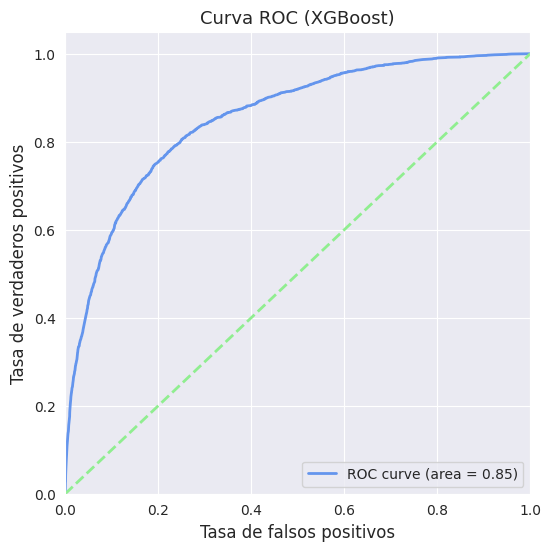

In [73]:

# Obtener probabilidades para la clase positiva (fraude)
y_prob_xgb = model_xgb.predict_proba(X_test_sel)[:, 1]

# Calcular la Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)

# Crear DataFrame para la gráfica
df_roc = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

# Estilo de la gráfica
sns.set_style("darkgrid")  # Fondo gris estilo la imagen proporcionada
plt.figure(figsize=(6, 6))

# Línea ROC principal
sns.lineplot(x='FPR', y='TPR', data=df_roc, color='cornflowerblue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')

# Línea diagonal de referencia
plt.plot([0, 1], [0, 1], linestyle="--", color="lightgreen", lw=2)

# Ajustes de ejes y etiquetas
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos', fontsize=12)
plt.ylabel('Tasa de verdaderos positivos', fontsize=12)
plt.title('Curva ROC (XGBoost)', fontsize=13)
plt.legend(loc="lower right", fontsize=10)

# Mostrar la gráfica
plt.show()
